# Lab 0 - Part II: Secrets of Happiness

In the first part of this lab, we learned how to use Python to run
different kinds of simulations, such as:

- generate a population with different characteristics,
- match individuals in the marriage market based on pre-defined criteria,
- generate the happiness score of each individual based on their characteristics.

At the end of last lab, we saved our data in a CSV file, called
`marriage_data.csv`. In this part, we will learn how to analyze the
data we generated with `R`.

Most of the time, you just need to run the code in the cells below by
clicking on the "Run" button. If you see `# Change the code below` in
the cell, you need to modify the code before running it.

In [1]:
# load libraries and some helper functions
library(pacman)
p_load(data.table, magrittr, ggplot2, knitr, psych, stargazer)

# color palette
gray_scale <- c('#F3F4F8','#D2D4DA', '#B3B5BD', 
                '#9496A1', '#7d7f89', '#777986', 
                '#656673', '#5B5D6B', '#4d505e',
                '#404352', '#2b2d3b', '#282A3A',
                '#1b1c2a', '#191a2b',
                '#141626', '#101223')

ft_palette <- c('#990F3D', '#0D7680', '#0F5499', '#262A33', '#FFF1E5')

ft_contrast <- c('#F83', '#00A0DD', '#C00', '#006F9B', '#F2DFCE', '#FF7FAA',
                 '#00994D', '#593380')

peep_head <- function(dt, n = 5) {
    dt %>%
        head(n) %>%
        kable()
}

peep_sample <- function(dt, n = 5) {
    dt %>%
        .[sample(.N, n)] %>%
        kable()
}

peep_tail <- function(dt, n = 5) {
    dt %>%
        tail(n) %>%
        kable()
}

Warning message:
“package ‘pacman’ was built under R version 4.2.3”
also installing the dependency ‘mnormt’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


psych installed

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


stargazer installed



## First step of data analysis: Load the data

The first step of data analysis is to load the data. We will use the
`fread` function from the `data.table` package to load the data. The
`fread` means file read, and it is a very fast function to read data
from a file.

In [2]:
# mdt means marriage data table
# you can name it whatever you want
mdt <- fread("../data/marriage_data.csv")

In [3]:
# check the structure of the data
str(mdt)

Classes ‘data.table’ and 'data.frame':	20000 obs. of  12 variables:
 $ id               : int  65215 97529 9063 3643 79301 2908 23231 21382 72953 98314 ...
 $ name             : chr  "rfkvim" "epsvop" "oscprp" "zmjhqu" ...
 $ age              : int  21 40 33 21 35 30 35 41 23 28 ...
 $ income           : num  1071 2067 686 5838 5749 ...
 $ openness         : num  69.5 45.5 61.7 54 83 ...
 $ conscientiousness: num  54.9 47.4 57.2 62.2 60 ...
 $ extraversion     : num  43.7 40.6 52.6 41.9 47.4 ...
 $ agreeableness    : num  35.5 38.1 58.9 41.8 46.1 ...
 $ neuroticism      : num  39.3 77.7 47.5 57.8 52.2 ...
 $ tolerance        : num  41.4 33.1 24.3 16.5 20.9 ...
 $ matched_id       : int  1125 89529 43099 24269 73161 59113 46579 9578 44891 74294 ...
 $ happiness        : num  73.2 55.5 60.4 69.1 77.6 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [4]:
head(mdt)

id,name,age,income,openness,conscientiousness,extraversion,agreeableness,neuroticism,tolerance,matched_id,happiness
<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
65215,rfkvim,21,1071.18,69.48,54.94,43.74,35.49,39.34,41.37,1125,73.16
97529,epsvop,40,2066.83,45.53,47.35,40.59,38.14,77.66,33.12,89529,55.50
9063,oscprp,33,685.69,61.72,57.20,52.56,58.88,47.48,24.33,43099,60.43
3643,zmjhqu,21,5837.52,54.04,62.17,41.94,41.75,57.76,16.50,24269,69.11
79301,epzlxj,35,5749.47,83.03,59.99,47.36,46.10,52.18,20.92,73161,77.64
2908,gmtubm,30,6576.84,51.05,69.24,40.68,42.48,58.26,24.37,59113,69.64


In [5]:
tail(mdt)

id,name,age,income,openness,conscientiousness,extraversion,agreeableness,neuroticism,tolerance,matched_id,happiness
<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
65270,jpjyyn,37,12228.74,51.09,55.66,56.14,55.21,59.66,34.54,NA,94.66
97229,ransao,48,398.44,54.71,74.86,42.63,45.88,56.09,33.04,58824,57.87
86205,clflza,49,5269.79,42.97,39.70,50.98,51.43,52.27,35.79,11809,71.48
16040,elwxkw,17,831.10,52.55,67.42,46.45,35.79,49.74,31.68,73291,63.60
36639,xmxmdq,58,3070.87,32.41,42.52,57.82,45.58,52.50,36.31,2446,63.94
19552,ehedgz,39,3520.55,55.09,64.27,47.14,56.73,67.79,37.53,14198,72.16


## What's the share of married people in the population?

From the first part of this lab, we know that people who are married
should have a `matched_id` different from `NA`. We can use this
information to calculate the share of married people in the
population.

In [6]:
# how many people are single?
# is.na() function is used to check missing values
# .N is a special symbol in data.table to calculate the number of rows
mdt %>%
    .[is.na(matched_id), .N]

[1] 2390

In [7]:
# with means with the dataset
# table gives the frequency of each unique value
# prop.table gives the proportion of each unique value
mdt %>%
    with(table(is.na(matched_id))) %>%
    prop.table() %>%
    round(4)


 FALSE   TRUE 
0.8805 0.1195 

As the above results show that we have around $88.04\%$ of married
people in the population and $11.96\%$ of single people.

## Distribution of Variables

Now, we want to check the distribution of the variables in the
population. We will try to find out whether the variables are normally
distributed or not.

In [8]:
# let's check the age first
mdt %>%
    with(summary(age))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.00   27.00   38.00   38.04   49.00   60.00 

In [9]:
mdt %>%
    .[, .(age)] %>%
    head()

age
<int>
21
40
33
21
35
30


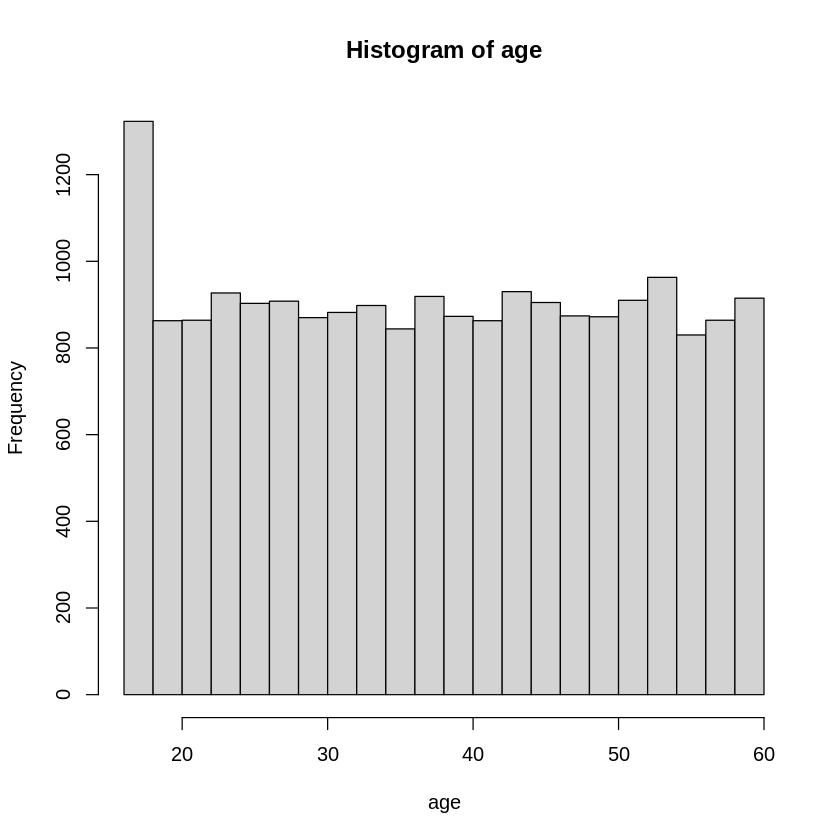

In [10]:
mdt %>%
    with(hist(age, breaks = 20))

It looks like the `age` variable follows the uniform distribution, which
means that the age of people in the population is uniformly
distributed.

In [ ]:
# now let's check the income
mdt %>%
    with(summary(income))

In [ ]:
mdt %>%
    with(hist(income, breaks = 20))

The distribution of the `income` variable is right-skewed, which means
that most people have low income, and only a few people have high
income. This is consistent with the real world. However the log
transformation of the `income` variable is normally distributed
as it is shown in the following figure.

In [ ]:
# do the log transformation
mdt %>%
    with(hist(log(income), breaks = 20))

In [ ]:
# put tow histograms side by side
options(repr.plot.width = 8, repr.plot.height = 5)
par(mfrow = c(1, 2))
hist(mdt$income, breaks = 20, main = "Income")
hist(log(mdt$income), breaks = 20, main = "Log Income")

In [ ]:
# distribution of openess
mdt %>%
    with(hist(openness, breaks = 20))

## Plot distribution of selected variables at one time

In [ ]:
str(mdt)

In [ ]:
# chagne figure size
options(repr.plot.width = 10, repr.plot.height = 10)
mdt %>%
    # select the columns you want to plot
    .[, .(age, income, openness, agreeableness, tolerance, happiness)] %>%
    pairs.panels(
        method = "pearson", # correlation method
        hist.col = "#00AFBB",
        density = TRUE,  # show density plots
    )

## Does marriage make people happy?

Now, we want to check whether married people are happier than single
people. We will first plot the distribution of the happiness score for
married and single people. And then we will compare the average
happiness score of married and single people. We will also run
statistical tests to check whether the difference in the average
happiness score is statistically significant or not.

In [12]:
# add a new column to the data table
mdt %>%
    .[, is_married := ifelse(is.na(matched_id), 'No', 'Yes')] %>%
    head()

id,name,age,income,openness,conscientiousness,extraversion,agreeableness,neuroticism,tolerance,matched_id,happiness,is_married
<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
65215,rfkvim,21,1071.18,69.48,54.94,43.74,35.49,39.34,41.37,1125,73.16,Yes
97529,epsvop,40,2066.83,45.53,47.35,40.59,38.14,77.66,33.12,89529,55.50,Yes
9063,oscprp,33,685.69,61.72,57.20,52.56,58.88,47.48,24.33,43099,60.43,Yes
3643,zmjhqu,21,5837.52,54.04,62.17,41.94,41.75,57.76,16.50,24269,69.11,Yes
79301,epzlxj,35,5749.47,83.03,59.99,47.36,46.10,52.18,20.92,73161,77.64,Yes
2908,gmtubm,30,6576.84,51.05,69.24,40.68,42.48,58.26,24.37,59113,69.64,Yes


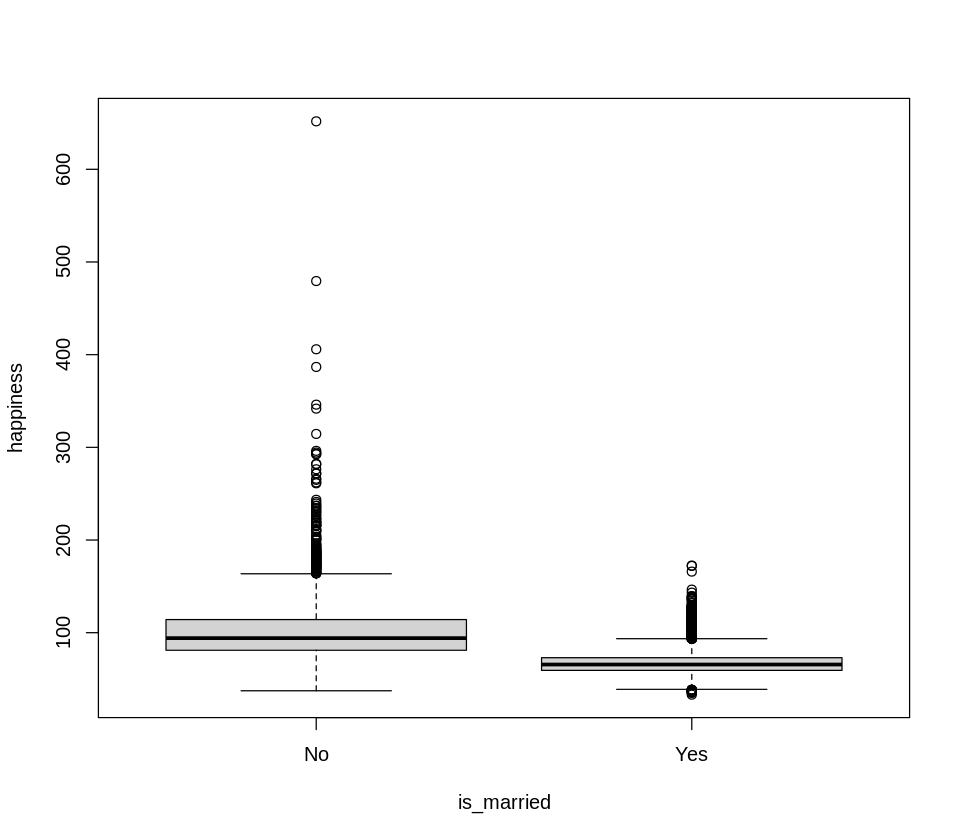

In [13]:
options(repr.plot.width = 8, repr.plot.height = 7)
mdt %>%
    with(boxplot(happiness ~ is_married))

From the above plot, it seems that married people are less happy than
single people. Does this mean that marriage makes people unhappy?

In [14]:
# let's run the t-test
# t.test is a function in R to run t-test
mdt %>%
    .[!is.na(happiness)] %>%
    with(t.test(happiness ~ is_married))


	Welch Two Sample t-test

data:  happiness by is_married
t = 45.655, df = 2452.6, p-value < 2.2e-16
alternative hypothesis: true difference in means between group No and group Yes is not equal to 0
95 percent confidence interval:
 33.95284 37.00038
sample estimates:
 mean in group No mean in group Yes 
         102.5860           67.1094 


For this t-test, our hypothesis is:

- $H_0$: The average happiness score of married people is the same as
  the average happiness score of single people.
- $H_1$: The average happiness score of married people is different

Based on the t-test results, we can reject the null hypothesis and
conclude that the average happiness score of married people is
different from the average happiness score of single people.

## Selection Bias, reverse causality, and omitted variable bias

From the above results, we can see that married people are less happy
than single people. However, this does not mean that marriage makes
people unhappy. There are several reasons why married people are less
happy than single people:

- **Selection Bias**: People who are married may have different
  characteristics than people who are single. For example, married
  people may be older than single people, and older people may be less
  happy than younger people. When we generate the population, we
  did not use marriage as a factor to generate the happiness score.
- **Reverse Causality**: People who are less happy may be less likely
  to get married. For example, people who are less happy may be less
  likely to get married because they are less likely to find a
  partner. When we generate the population, we did not use the
  happiness score as a factor to generate marriage.
- **Omitted Variable Bias**: There may be other factors that affect
  both marriage and happiness. For example, people who are more
  open and agreeable may be more likely to get married and may be happier.

This is the formulat we used to generate the happiness score:

$$
\text{Happiness} = 0.03 \times \text{Income} + 0.4 \times \text{Openness} + 0.32 \times \text{Agreeableness} + 0.57 \times \text{Tolerance} +  0.02 \times (\text{Age} - 40)^2 
$$

> Takeaway: Correlation does not imply causation. Statistical tests
do not prove causation. When we find some statistical difference, we
need to think about the reasons behind it. Sometimes, the difference
is due to selection bias, reverse causality, or omitted variable bias.
Or it may be due to random chance.

## Your first regression analysis

Now, we will run a regression analysis to check whether marriage has a
causal effect on happiness. The regression analysis will help us to
control for other factors that may affect happiness, such as income,
age, openness, agreeableness, and tolerance, etc.

In this regression analysis, we will not use `openness`, `agreeableness`, or `tolerance` as those factors are not measured in the real world. We will only use `income`, `age`, and `married` as the independent variables.

In [15]:
head(mdt)

id,name,age,income,openness,conscientiousness,extraversion,agreeableness,neuroticism,tolerance,matched_id,happiness,is_married
<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
65215,rfkvim,21,1071.18,69.48,54.94,43.74,35.49,39.34,41.37,1125,73.16,Yes
97529,epsvop,40,2066.83,45.53,47.35,40.59,38.14,77.66,33.12,89529,55.50,Yes
9063,oscprp,33,685.69,61.72,57.20,52.56,58.88,47.48,24.33,43099,60.43,Yes
3643,zmjhqu,21,5837.52,54.04,62.17,41.94,41.75,57.76,16.50,24269,69.11,Yes
79301,epzlxj,35,5749.47,83.03,59.99,47.36,46.10,52.18,20.92,73161,77.64,Yes
2908,gmtubm,30,6576.84,51.05,69.24,40.68,42.48,58.26,24.37,59113,69.64,Yes


In [16]:
# run a linear regression
# lm is a function in R to run linear regression
lm_model1 <- lm(happiness ~ age + income + is_married, data = mdt)
summary(lm_model1)


Call:
lm(formula = happiness ~ age + income + is_married, data = mdt)

Residuals:
     Min       1Q   Median       3Q      Max 
-27.4102  -4.7970  -0.0146   4.7453  28.0089 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6.046e+01  2.528e-01 239.202  < 2e-16 ***
age           -7.798e-02  3.857e-03 -20.219  < 2e-16 ***
income         2.971e-03  9.572e-06 310.360  < 2e-16 ***
is_marriedYes -9.291e-01  1.904e-01  -4.881 1.06e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.08 on 19996 degrees of freedom
Multiple R-squared:  0.8821,	Adjusted R-squared:  0.882 
F-statistic: 4.985e+04 on 3 and 19996 DF,  p-value: < 2.2e-16


In [17]:
stargazer(lm_model1, type = "text")


                         Dependent variable:     
                    -----------------------------
                              happiness          
-------------------------------------------------
age                           -0.078***          
                               (0.004)           
                                                 
income                        0.003***           
                              (0.00001)          
                                                 
is_marriedYes                 -0.929***          
                               (0.190)           
                                                 
Constant                      60.464***          
                               (0.253)           
                                                 
-------------------------------------------------
Observations                   20,000            
R2                              0.882            
Adjusted R2                     0.882            

In [18]:
# using qudratic term for age
lm_model2 <- lm(happiness ~ age + I(age^2) + income + is_married, data = mdt)
summary(lm_model2)


Call:
lm(formula = happiness ~ age + I(age^2) + income + is_married, 
    data = mdt)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.2413  -4.3068   0.0589   4.3655  23.8923 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    8.506e+01  4.393e-01 193.640   <2e-16 ***
age           -1.585e+00  2.322e-02 -68.258   <2e-16 ***
I(age^2)       1.982e-02  3.020e-04  65.649   <2e-16 ***
income         2.995e-03  8.690e-06 344.668   <2e-16 ***
is_marriedYes -2.606e-01  1.730e-01  -1.507    0.132    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.422 on 19995 degrees of freedom
Multiple R-squared:  0.903,	Adjusted R-squared:  0.9029 
F-statistic: 4.652e+04 on 4 and 19995 DF,  p-value: < 2.2e-16


In [19]:
stargazer(lm_model2, type = "text")


                         Dependent variable:     
                    -----------------------------
                              happiness          
-------------------------------------------------
age                           -1.585***          
                               (0.023)           
                                                 
I(age2)                       0.020***           
                              (0.0003)           
                                                 
income                        0.003***           
                              (0.00001)          
                                                 
is_marriedYes                  -0.261            
                               (0.173)           
                                                 
Constant                      85.063***          
                               (0.439)           
                                                 
-------------------------------------------------

As you can see that from the second regression model, the coefficient
for `married` is not statistically significant. This means that
marriage does not have effect on happiness. This is because we have
controlled for other factors that may affect happiness, such as income ang age.

When we only use linear term for `age` in the regression model, the coefficient for `married` is statistically significant. This means that finding the right regression model is very important. As the following graph shows that happiness score first
decreases and then increases with age. This is consistent with the
real world. This is also how we generated the happiness score in the
first part of this lab.

<iframe src="https://www.desmos.com/calculator/w79mztebg5?embed" width="500" height="500" style="border: 1px solid #ccc" frameborder=0></iframe>

In [ ]:
lm_model3 <- lm(happiness ~ age + I(age^2) + income + is_married + openness + agreeableness + tolerance, data = mdt)
summary(lm_model3)

In [ ]:
stargazer(lm_model3, type = "text")

Now, please check the coefficients of the regression model and compare 
them with the coefficients we used to generate the happiness score
in the following formula:

$$
\text{Happiness} = 0.03 \times \text{Income} + 0.4 \times \text{Openness} + 0.32 \times \text{Agreeableness} + 0.57 \times \text{Tolerance} +  0.02 \times (\text{Age} - 40)^2 
$$